<a href="https://colab.research.google.com/github/mattany/IML/blob/main/problem_set_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

2.b. It's interesting how similar the ouptut of the perceptron on the first and second training sets is.

Draw the axes:

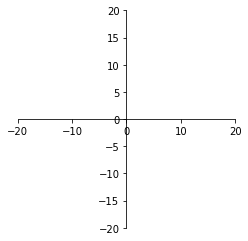

In [2]:
pos_dist_size = 20
def plot_axes():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.xlim(-pos_dist_size, pos_dist_size)
    plt.ylim(-pos_dist_size, pos_dist_size)
    plt.gca().set_aspect('equal', adjustable='box')

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
plot_axes()

Draw a random line:

In [3]:
def random_hyperplane(d):
    plane = pos_dist_size * 2 * np.random.random_sample(size=(d, d)) - pos_dist_size
    ones = np.empty(d)
    ones.fill(1)
    w = np.linalg.solve(plane, ones)
    w = np.append(-1, w) # Homogenize
    return w

# m, n = random_line()

    
w_star = random_hyperplane(2)

Generate the inputs:

In [4]:
def gen_inputs(n, d):
    inputs = pos_dist_size * 2 * np.random.random_sample(size=(n, d)) - pos_dist_size
    inputs = np.c_[np.ones(inputs.shape[0]), inputs] # Homogenize
    return inputs

inputs = gen_inputs(20, 2)

Evaluate the inputs and plot the outputs:

In [5]:
def evaluate_point(w, x):
    return np.dot(w, x) > 0

def evaluate_points(inputs, w):
    return [evaluate_point(w, input) for input in inputs]
 

def get_plot_coords(w):

    Xs = [-pos_dist_size, pos_dist_size, 0]
    Ys = [
        (-w[0] - w[1] * Xs[0]) / w[2],
        (-w[0] - w[1] * Xs[1]) / w[2],
        (-w[0] - w[1] * Xs[2]) / w[2]
    ]
    return Xs, Ys

outputs = evaluate_points(inputs, w_star)




def plot_outputs(w, w_star, inputs, outputs):
    plot_axes()
    red_Xs = [ inputs[i][1] for i in range(len(inputs)) if outputs[i] == 1]
    red_Ys = [ inputs[i][2] for i in range(len(inputs)) if outputs[i] == 1]
    blue_Xs = [ inputs[i][1] for i in range(len(inputs)) if outputs[i] == 0 ]
    blue_Ys = [ inputs[i][2] for i in range(len(inputs)) if outputs[i] == 0 ]
    plt.scatter(red_Xs, red_Ys, color="magenta")
    plt.scatter(blue_Xs, blue_Ys, color="turquoise")
    plt.plot(*get_plot_coords(w),  label="f - target function", color="red")
    plt.plot(*get_plot_coords(w_star), label="g - final hypothesis", color="green")
    plt.legend()

a. Converged in 109 updates
c. f and g are visibly different


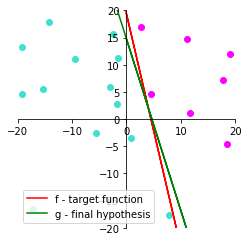

In [6]:
steps = 0

def perceptron(inputs, outputs):
    shape = np.shape(inputs[0])
    w = np.zeros(shape)
    steps =0
    done = False
    while not done:
        done = True
        for i, inp in enumerate(inputs):
            res_i = np.dot(w, inp) > 0
            if outputs[i] ^ res_i:
                done = False
                y_i = 1 if outputs[i] else -1
                w += y_i * inp   
                steps +=1
    print(f"a. Converged in {steps} updates")
    return w, steps

w, _ = perceptron(inputs, outputs)
plot_outputs(w, w_star, inputs, outputs)
print(f"c. f and g are visibly different")

2.a.a-c can be seen above. Now we generate test data and calculate the error.

Generate some test data:

In [7]:
test_inputs = gen_inputs(100, 2)


2.a.d.

In [8]:

def calculate_error(test_inputs, w, w_star):
    n = len(test_inputs)
    test_outputs = evaluate_points(test_inputs, w_star)
    actual_outputs = evaluate_points(test_inputs, w)
    return sum([test_outputs[i] ^ actual_outputs[i] for i in range(n)]) / 100


print(f"d. f and g disagree on {calculate_error(test_inputs, w, w_star)} of the points")

d. f and g disagree on 0.04 of the points


2.b.

In [9]:
b_inputs = gen_inputs(20, 2)
b_outputs = evaluate_points(b_inputs, w_star)

a. Converged in 98 updates
c. f and g are visibly different
d. f and g disagree on 0.11 of the points


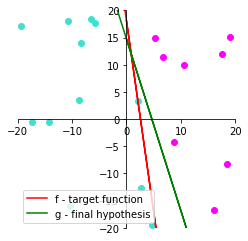

In [10]:

b_w, _ = perceptron(b_inputs, b_outputs)
plot_outputs(b_w, w_star, b_inputs, b_outputs)
print(f"c. f and g are visibly different")
print(f"d. f and g disagree on {calculate_error(test_inputs, b_w, w_star)} of the points")

2.c. The time to converge grew, and the result is more accurate.

In [11]:
c_inputs = gen_inputs(100, 2)
c_outputs = evaluate_points(c_inputs, w_star)

a. Converged in 120 updates
c. f and g are much closer than before.
d. f and g disagree on 0.04 of the points


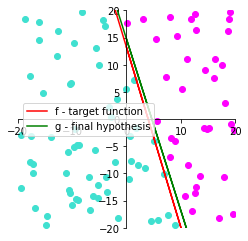

In [12]:

c_w, _ = perceptron(c_inputs, c_outputs)
plot_outputs(c_w, w_star, c_inputs, c_outputs)
print(f"c. f and g are much closer than before.")
print(f"d. f and g disagree on {calculate_error(test_inputs, c_w, w_star)} of the points")

2.d. The time to converge grew marginally more, and now the lines are nearly indistinguishable.



In [13]:
d_inputs = gen_inputs(1000, 2)
d_outputs = evaluate_points(d_inputs, w_star)

a. Converged in 562 updates
c. f and g are almost the same.
d. f and g disagree on 0.0 of the points


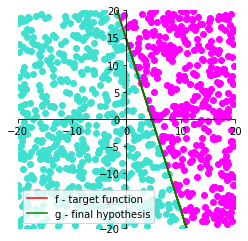

In [14]:
d_w, _ = perceptron(d_inputs, d_outputs)
plot_outputs(d_w, w_star, d_inputs, d_outputs)
print(f"c. f and g are almost the same.")
print(f"d. f and g disagree on {calculate_error(test_inputs, d_w, w_star)} of the points")

2.e. Randomize input order 100 times and plot histogram of the update amount.

In [15]:
pos_dist_size = 5
e_w_star = random_hyperplane(10)
e_inputs = gen_inputs(1000, 10)

rep 0. a. Converged in 8537 updates
rep 1. a. Converged in 6385 updates
rep 2. a. Converged in 7454 updates
rep 3. a. Converged in 6668 updates
rep 4. a. Converged in 7493 updates
rep 5. a. Converged in 6476 updates
rep 6. a. Converged in 5364 updates
rep 7. a. Converged in 4408 updates
rep 8. a. Converged in 9831 updates
rep 9. a. Converged in 6383 updates
rep 10. a. Converged in 7292 updates
rep 11. a. Converged in 5422 updates
rep 12. a. Converged in 4041 updates
rep 13. a. Converged in 6458 updates
rep 14. a. Converged in 8442 updates
rep 15. a. Converged in 9833 updates
rep 16. a. Converged in 4100 updates
rep 17. a. Converged in 7089 updates
rep 18. a. Converged in 7827 updates
rep 19. a. Converged in 4219 updates
rep 20. a. Converged in 9245 updates
rep 21. a. Converged in 8098 updates
rep 22. a. Converged in 6341 updates
rep 23. a. Converged in 5113 updates
rep 24. a. Converged in 9293 updates
rep 25. a. Converged in 9028 updates
rep 26. a. Converged in 7358 updates
rep 27. a. 

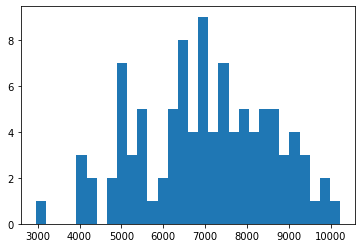

In [16]:
def perceptron_random(inputs, outputs):
    shape = np.shape(inputs[0])
    w = np.zeros(shape)
    n = len(inputs)
    steps =0
    done = False
    correctly_classified = set()
    while len(correctly_classified) < n:
        i = np.random.randint(n)
        if i not in correctly_classified:
            res_i = np.dot(w, inputs[i]) > 0
            if outputs[i] ^ res_i:
                correctly_classified = set()
                y_i = 1 if outputs[i] else -1
                w += y_i * inputs[i] 
                steps +=1
            else:
                correctly_classified.add(i)
    print(f"a. Converged in {steps} updates")
    return w, steps


def get_histogram_values(reps):
    ret = np.zeros(reps)
    for i in range(reps):
        print(f"rep {i}.", end=" ")
        # np.random.shuffle(e_inputs)
        e_outputs = evaluate_points(e_inputs, e_w_star)
        # _, steps = perceptron(e_inputs, e_outputs)
        _, steps = perceptron_random(e_inputs, e_outputs)
        ret[i] = steps
    return ret

ret = get_histogram_values(100)
plt.hist(ret, bins=30)
plt.show()


2.f. We can conclude from the examples that the time to converge increases with N and d, and that the accuracy increase as the size of the training set (N) grows. It's not clear from theh examples what effect the dimension of the data has on the accuracy, since in the example with dimension 10 we weren't asked to benchmark the accuracy of the results. One thing that is clear is that the smaller the range of data points, the faster PLA converges.